## Problem Definition

An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis to answer the following questions using the collected data.

## Objective: 

Statistical analysis of business data. Explore the dataset and extract insights from the data. The idea is for you to get comfortable with doing statistical analysis in Python.

You are expected to perform the statistical analysis to answer the following questions:

 1. Explore the dataset and extract insights using Exploratory Data Analysis.
 2. Do the users spend more time on the new landing page than the old landing page?
 3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
 4. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]
 5. Is the mean time spent on the new page same for the different language users?

*Consider a significance level of 0.05 for all tests.

### Import Libraries 

In [3]:
#import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline 

import scipy.stats as stats # this library contains a large number of probability distributions 

### Reading the data into the DataFrame 

In [4]:
df = pd.read_csv('abtest.csv')
df.head(10)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish
5,546558,control,old,5.28,yes,English
6,546448,treatment,new,5.25,yes,French
7,546581,control,old,6.53,yes,Spanish
8,546461,treatment,new,10.71,yes,French
9,546548,control,old,2.08,no,English


In [5]:
# shape of the dataset
df.shape

(100, 6)

 - The dataset contains 30 rows and 3 columns

In [6]:
df.info() #checks info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


- There are 2 numeric columns and 4 object columns, 100 total entries

In [7]:
# categorical column should be converted to categorical type 

df['group']= df.group.astype('category')
df['landing_page']= df.landing_page.astype('category')
df['converted']= df.converted.astype('category')
df['language_preferred']= df.language_preferred.astype('category')
df.info() #checks info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.6 KB


## Exploratory Data Analysis

In [8]:
#Making a list of all catrgorical variables 
cat_col=['group', 'landing_page', 'converted','language_preferred']

#Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    print('-'*50)

control      50
treatment    50
Name: group, dtype: int64
--------------------------------------------------
new    50
old    50
Name: landing_page, dtype: int64
--------------------------------------------------
yes    54
no     46
Name: converted, dtype: int64
--------------------------------------------------
French     34
Spanish    34
English    32
Name: language_preferred, dtype: int64
--------------------------------------------------


**Observations**

 - Groups are divided equally by "control" and "treatment" as well as by "new" and "old" 
 - 54 have been converted and 46 have not 
 - equal number of French and Spanish with the least speaking English 

In [9]:
df = df.drop(['user_id'], axis=1)
df.describe() #summarizes numeric data

,time_spent_on_the_page
count,100.000000
mean,5.377800
std,2.378166
min,0.190000
25%,3.880000
50%,5.415000
75%,7.022500
max,10.710000


 **Summary**

 - Mean is 5.378 with Std Dev of 2.378
 - Max time spent on page is ~11 minutes 

## Univariate Analysis

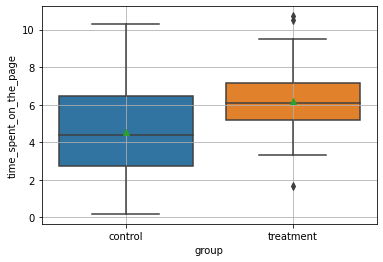

In [10]:
# visual analysis of control vs. treatment group
sns.boxplot(x="group", y="time_spent_on_the_page", data = df, showmeans=True)
plt.grid()
plt.show()

- control group shows a much larger variance on time spent on the page

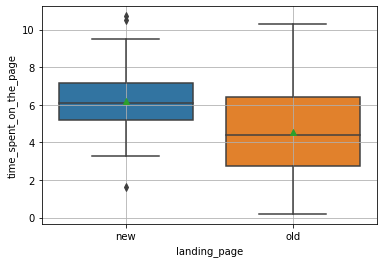

In [11]:
# visual analysis of old page vs. new page 
sns.boxplot(x="landing_page", y="time_spent_on_the_page", data = df, showmeans=True)
plt.grid()
plt.show()

 - Greater range spent on old landing with lower mean of 4 minutes

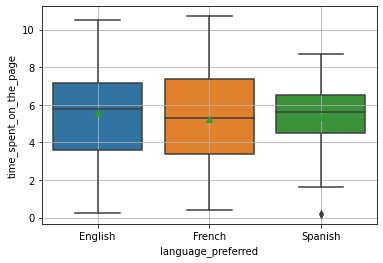

In [12]:
# visual analysis of different languages and time they spents on both landing pages 
sns.boxplot(x="language_preferred", y="time_spent_on_the_page", data = df, showmeans=True)
plt.grid()
plt.show()

- Similar means with Spanish having a larger variance 

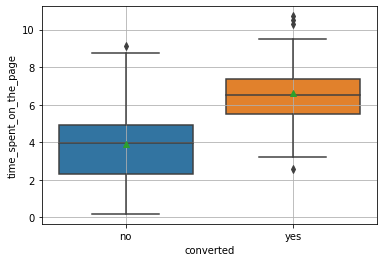

In [13]:
# visual analysis of coverted vs. not converted
sns.boxplot(x="converted", y="time_spent_on_the_page", data = df, showmeans=True)
plt.grid()
plt.show()

 - Very clearly indicates converted group spends more time

# Multivariate Analysis

<Figure size 864x504 with 0 Axes>

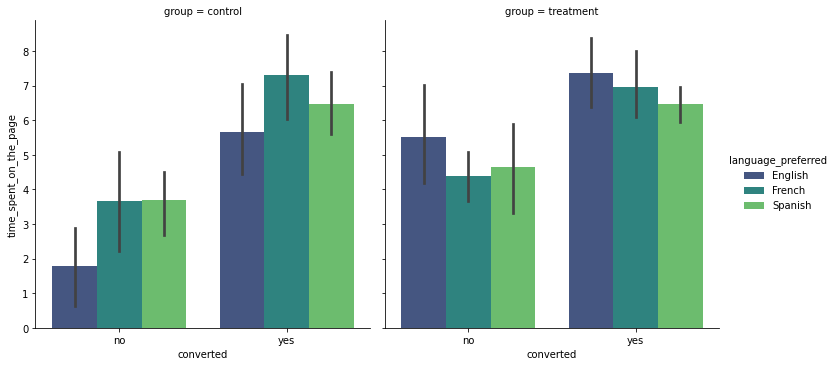

In [14]:
plt.figure(figsize=(12,7))
sns.catplot(x='converted', y='time_spent_on_the_page', col='group', hue='language_preferred', kind="bar", data=df, palette="viridis")

 - In both groups those spending the most time on the page appear to be converted
 

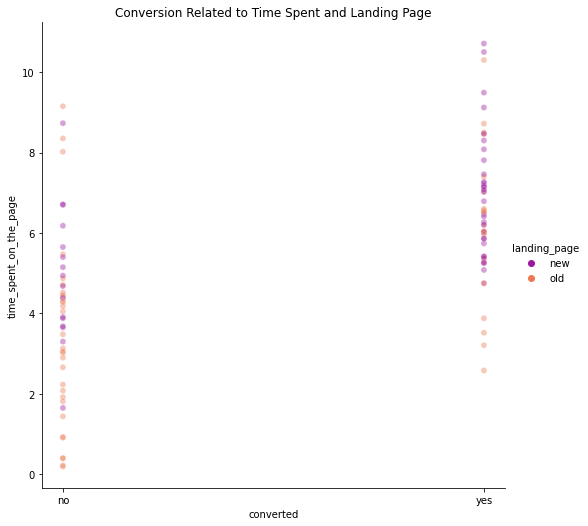

In [15]:
#scatter plot between conversion, time, and landing page
sns.relplot(x='converted', y='time_spent_on_the_page', hue='landing_page', alpha=.4, palette="plasma",
            height=7, data=df).set(title='Conversion Related to Time Spent and Landing Page')

 - Appears many unconverted vistors were from the old page or control group

## 1. Do users spend more time on the new landing page than the old landing page?

 ### 1.1 Let's write the null and alternative hypothesis


Let μn,μo be the mean time spent on new and old landing pages respectively.

We will test the null hypothesis

    H0:μn=μo

against the alternate hypothesis

    Ha:μn>μo
    

### 1.2 Dividing population samples  

In [16]:
#create df for new landing page
newLP = df.loc[df.landing_page=="new"]
newLP.head()

,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,treatment,new,7.13,yes,English
2,treatment,new,4.40,no,Spanish
4,treatment,new,4.75,yes,Spanish
6,treatment,new,5.25,yes,French
8,treatment,new,10.71,yes,French


In [17]:
#create df for old landing page 
oldLP = df.loc[df.landing_page=="old"]
oldLP.head()

,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,control,old,3.48,no,Spanish
3,control,old,3.02,no,French
5,control,old,5.28,yes,English
7,control,old,6.53,yes,Spanish
9,control,old,2.08,no,English


In [18]:
# find the sample means and sample standard deviations for the two samples
print('The mean time spent on the new landing page is ' + str(round(oldLP['time_spent_on_the_page'].mean(),2)))
print('The mean time spent on the old landing page is ' + str(round(newLP['time_spent_on_the_page'].mean(), 2)))
print('The standard deviation of time spent on the new landing page is ' + str(round(oldLP['time_spent_on_the_page'].std(), 2)))
print('The standard deviation of time spent on the old landing page is ' + str(round(newLP['time_spent_on_the_page'].std(), 2)))

The mean time spent on the new landing page is 4.53
The mean time spent on the old landing page is 6.22
The standard deviation of time spent on the new landing page is 2.58
The standard deviation of time spent on the old landing page is 1.82


### 1.3 Selecting Appropriate Test 

**2 Sample Independent T-Test**
- Continuous data 
- Normally distributed populations 
- Independent populations 
- Unequal population standard deviations 
- Random sampling from the population 

### 1.4 Finding the p-value

In [19]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(newLP['time_spent_on_the_page'], oldLP['time_spent_on_the_page'].dropna(), equal_var = False, alternative = 'greater')
print('The p-value is', p_value)

The p-value is 0.0001392381225166549


### 1.5 Insight

As the p-value (~0.0001) is less than the level of significance, we can reject the null hypothesis. Hence, we do have enough evidence to say users do not spend equal time on the pages.

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### 2.1 Let's write the null and alternative hypothesis

Let pn,po be the proportions of visitors who get converted from the new and old landing pages respectively.

We will test the null hypothesis

    H0:pn=po
    
against the alternate hypothesis

    Ha:pn>po

### 2.2 Preparing data for the test 

In [20]:
# number of converted visitors from new landing page 
new_converted = df[df['landing_page']=='new'].converted.value_counts()['yes']

# number of converted visitors from old landing page
old_converted = df[df['landing_page']=='old'].converted.value_counts()['yes']

print('The number of vistors converted from the new and old landing pages are {0} and {1} respectively'.format(new_converted, old_converted))

# number of visitors on old landing page 
n_new = df.landing_page.value_counts()['new']

# number of visitors on new landing page
n_old = df.landing_page.value_counts()['old']

print('The total numbers of visitors on the new and old landing pages are {0} and {1} respectively'.format(n_new, n_old))

The number of vistors converted from the new and old landing pages are 33 and 21 respectively
The total numbers of visitors on the new and old landing pages are 50 and 50 respectively


In [21]:
print(f' The proportions of conversions from the new and old landing pages are {round(33/50,2)}, {round(21/50,2)} respectively')

 The proportions of conversions from the new and old landing pages are 0.66, 0.42 respectively


- The proportions in the sample are different. Let's conduct the test to see if this difference is significant.

### 2.3 Selecting Appropriate Test 

 **2 Sample Proportions Z-Test**
 - Binomally distributed population
 - Random sampling from the population 
 - binomial distribution approximated to normal distribution

### 2.4 Finding the p-value 

In [22]:
# import the required function
from statsmodels.stats.proportion import proportions_ztest

# set the counts of converted visitors 
converted = np.array([33, 21])

# set the sample sizes
visitors = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(converted, visitors)
print('The p-value is ' + str(p_value))

The p-value is 0.016052616408112556


### 2.5 Insight

As the p-value is less than the significance level 0.05, we can reject the null hypothesis. We have strong evidence that the proportions of visitors visiting the old page and being converted is less than those getting converted from the new page. 

## 3. Does the converted status depend on preferred language? 

### 3.1 Let's write the null and alternative hypothesis

We will test the null hypothesis

    H0: Converted status is independent of preferred language.

against the alternate hypothesis

    Ha: Converted status depends on preferred language.

### 3.2 Preparing data for the test 

In [23]:
#creates a contingency table 
convlange = pd.crosstab(df.converted, df.language_preferred, margins=True)
convlange.head()

language_preferred,English,French,Spanish,All
converted,,,,
no,11,19,16,46
yes,21,15,18,54
All,32,34,34,100


### 3.3  Chi-Square Test of Independence

 - Categorical variables 
 - Expected value of the number of sample observations in each level of the variable is at least 5 
 - Random sampling from the population 

### 3.4 Find the p-value

In [24]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(convlange)
print('The p-value is', p_value)

The p-value is 0.7970832186581233


### 3.5 Insight 

As the p-value is greater than the significance level, we can reject the null hypothesis. Hence, we do have enough statistical significance to conclude that converted status is independent of preferred language at 5% significance level.

## 4. Is the mean time spent on the new page same for different language users?

### 4.1 Define the Null and Alternate Hypothesis

H0 : The mean time spent on the new page with respect to each language is equal.

Ha : At least one of the mean times spent on the new page with respect to preferred language is different.

### 4.2 Select Appropriate Test

This is a problem, concerning three population means (Spa. One-way ANOVA could be the appropriate test here provided normality and equality of variance assumptions are verified.

    For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

    For equality of variance, Levene test is applied to the response variable.

**Shapiro-Wilk’s test**

We will test the null hypothesis

    H0: The new page times follow a normal distribution

against the alternative hypothesis

    Ha: The new page times do not not follow a normal distribution

In [25]:
# Assumption 1: Normality
# Use the shapiro function for the scipy.stats library for this test

# find the p-value
w, p_value = stats.shapiro(df['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.5643684267997742


In [26]:
#creates a contingency table 
newlang = pd.crosstab(newLP.landing_page, newLP.language_preferred, margins=True)
newlang.head()

language_preferred,English,French,Spanish,All
landing_page,,,,
new,16,17,17,50
All,16,17,17,50


Since p-value of the test is much larger than the 5% significance level, we fail to reject the null hypothesis that the response follows the normal distribution.

**Levene’s test**

We will test the null hypothesis

    H0: All the population variances are equal

against the alternative hypothesis

    Ha: At least one variance is different from the rest

In [27]:
#Assumption 2: Homogeneity of Variance
# use levene function from scipy.stats library for this test

# find the p-value using "newLP" defined for time spent on the new landing page in previous question
statistic, p_value = stats.levene(newLP[newLP['language_preferred']=='English']['time_spent_on_the_page'],
                            newLP[newLP['language_preferred']=='French']['time_spent_on_the_page'],
                            newLP[newLP['language_preferred']=='Spanish']['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is larger than the 5% significance level, we fail to reject the null hypothesis of homogeneity of variances.

### 4.3 Prepare Data  

In [29]:
# separate the time spent on page with respect to the three languages
time_english = newLP[newLP['language_preferred']=='English']['time_spent_on_the_page']
time_french = newLP[newLP['language_preferred']=='French']['time_spent_on_the_page']
time_spanish = newLP[newLP['language_preferred']=='Spanish']['time_spent_on_the_page']


1     7.13
16    8.73
22    3.65
23    7.02
25    4.39
Name: time_spent_on_the_page, dtype: float64

### 4.4 Calculate the p-value

In [166]:
#perform one-way anova test using the f_oneway function from scipy.stats library
test_stat, p_value = stats.f_oneway(time_english, time_french, time_spanish)
print('The p-value is ', p_value)

The p-value is  0.43204138694325955


### 4.5 Conclusion

In [167]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


Since the p-value is greater than the 5% significance level, we retain the null hypothesis. Hence, we have enough statistical evidence to say that the mean time spent on the new landing page with respect to the three preferred languages are relativelythe same.

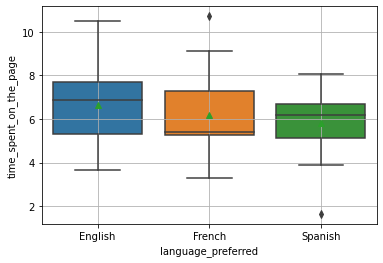

In [171]:
# visual analysis of preferred languages and time they spent on new landing page 
sns.boxplot(x="language_preferred", y="time_spent_on_the_page", data = newLP, showmeans=True)
plt.grid()
plt.show()